###  Task 1: Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3
[notice] To update, run: C:\Users\jason\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3
[notice] To update, run: C:\Users\jason\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
file_path = r"C:\Users\jason\OneDrive\Desktop\pcb_dataset_final.tsv"

In [5]:
df = pd.read_csv(file_path, sep='\t')

In [7]:
missing_values_summary = df.isnull().sum()

In [8]:
print(missing_values_summary[missing_values_summary > 0])

Series([], dtype: int64)


In [9]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [timestamp, uid, campaign, conversion, conversion_timestamp, conversion_id, attribution, click, click_pos, click_nb, cost, cpo, time_since_last_click, cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9]
Index: []

[0 rows x 22 columns]


In [10]:
zero_counts = (df == 0).sum()
print(zero_counts[zero_counts > 0])

timestamp             1
conversion     15661831
attribution    16025603
click          10520464
click_pos        400152
dtype: int64


In [12]:
print(df.dtypes)

timestamp                  int64
uid                        int64
campaign                   int64
conversion                 int64
conversion_timestamp       int64
conversion_id              int64
attribution                int64
click                      int64
click_pos                  int64
click_nb                   int64
cost                     float64
cpo                      float64
time_since_last_click      int64
cat1                       int64
cat2                       int64
cat3                       int64
cat4                       int64
cat5                       int64
cat6                       int64
cat7                       int64
cat8                       int64
cat9                       int64
dtype: object


In [7]:
df['campaign'] = df['campaign'].astype('category')

In [8]:
negative_values = df[['cost', 'cpo', 'time_since_last_click']].lt(0).sum()
print(negative_values[negative_values > 0])

time_since_last_click    8770820
dtype: int64


In [6]:
key_features = ['conversion', 'attribution', 'click','campaign']

for feature in key_features:
    print(f"{feature} unique values:", df[feature].nunique())
    print(f"{feature} value counts:\n", df[feature].value_counts(normalize=True))
    print("\n")

conversion unique values: 2
conversion value counts:
 conversion
0    0.951045
1    0.048955
Name: proportion, dtype: float64


attribution unique values: 2
attribution value counts:
 attribution
0    0.973134
1    0.026866
Name: proportion, dtype: float64


click unique values: 2
click value counts:
 click
0    0.638842
1    0.361158
Name: proportion, dtype: float64


campaign unique values: 675
campaign value counts:
 campaign
10341182    0.026560
30801593    0.026208
17686799    0.023141
15398570    0.022982
5061834     0.018202
              ...   
21898401    0.000015
31427832    0.000013
20443097    0.000013
13442441    0.000008
13442456    0.000001
Name: proportion, Length: 675, dtype: float64




### Feature Analysis

#### Conversion
- **Unique Values**: 2 (0 and 1)
- **Distribution**: ~95% of impressions did not result in a conversion, while ~5% did. This is typical in advertising datasets and provides a baseline conversion rate to assess the effectiveness of impressions.

#### Attribution
- **Unique Values**: 2 (0 and 1)
- **Distribution**: Only about 2.7% of conversions are attributed to Criteo, which gives insight into the platform's direct influence on conversions. This is useful for understanding Criteo’s contribution relative to other channels.

#### Click
- **Unique Values**: 2 (0 and 1)
- **Distribution**: About 36% of impressions led to a click, which is substantial engagement. This click-through rate indicates how engaging the ads are to users, and it could serve as a foundation for comparing click to conversion rates to see how often clicks lead to conversions.

#### Campaign
- **Unique Values**: 675
- **Distribution**: The long tail distribution here shows a mix of high- and low-frequency campaigns, with only a few campaigns having high proportions. This indicates which campaigns dominate impressions and could point to the need to focus on top campaigns for deeper analysis.



In [ ]:
#1: Plot Only the Top 10 Campaigns by CTR

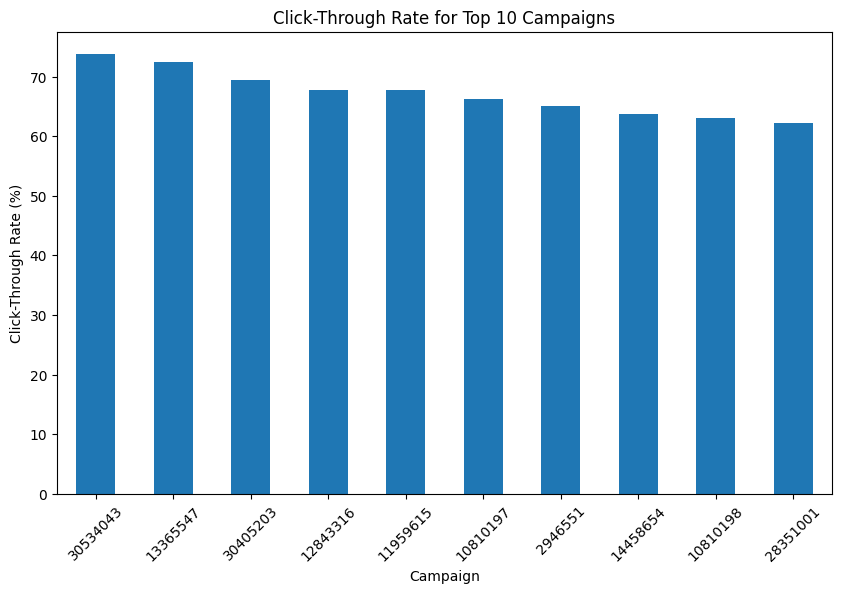

In [11]:
# Get the top 10 campaigns by CTR
top_campaigns_ctr = ctr_by_campaign.nlargest(10)

# Plot CTR for the top 10 campaigns
plt.figure(figsize=(10, 6))
top_campaigns_ctr.plot(kind='bar')
plt.title('Click-Through Rate for Top 10 Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Click-Through Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
 #2: Aggregate Campaigns into Bins (e.g., High, Medium, Low CTR)

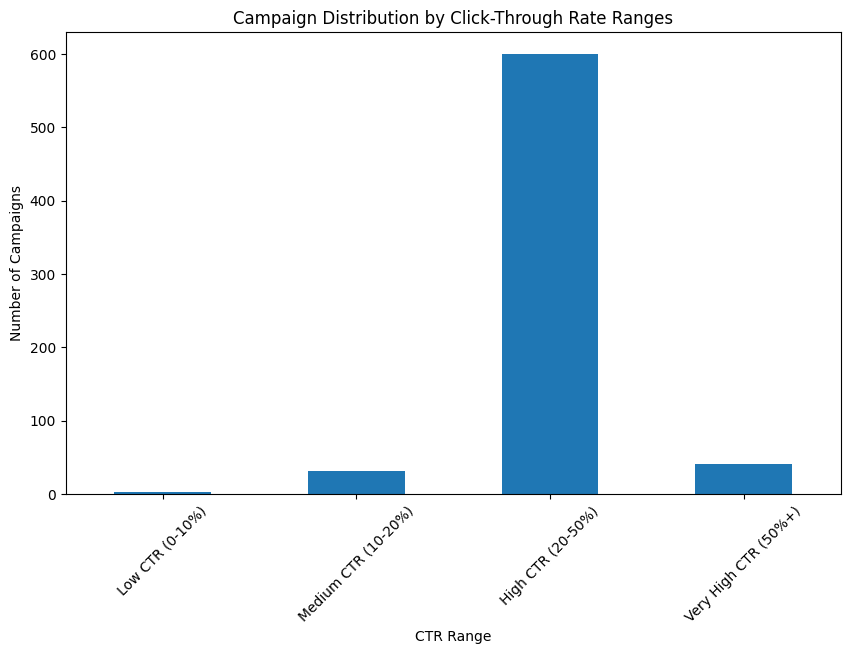

In [12]:
# Define bins for CTR ranges (customize ranges as needed)
bins = [0, 10, 20, 50, 100]
labels = ['Low CTR (0-10%)', 'Medium CTR (10-20%)', 'High CTR (20-50%)', 'Very High CTR (50%+)']

# Bin campaigns by CTR and count the number in each bin
ctr_binned = pd.cut(ctr_by_campaign, bins=bins, labels=labels)
ctr_binned_counts = ctr_binned.value_counts().sort_index()

# Plot the number of campaigns in each CTR range
plt.figure(figsize=(10, 6))
ctr_binned_counts.plot(kind='bar')
plt.title('Campaign Distribution by Click-Through Rate Ranges')
plt.xlabel('CTR Range')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#3: Display Summary Statistics for CTR by Campaign

In [13]:
# Summary statistics for CTR across all campaigns
ctr_summary = ctr_by_campaign.describe()
print("Summary Statistics for CTR by Campaign:")
print(ctr_summary)

Summary Statistics for CTR by Campaign:
count    675.000000
mean      34.868340
std        9.341318
min        8.465011
25%       29.395515
50%       34.274107
75%       39.470519
max       73.829667
Name: click, dtype: float64


### Task 2: Baseline Attribution Models

In [ ]:
#First Click Attribution Model

In [28]:
# Step 1: Filter for rows where a click led to a conversion (click == 1, conversion == 1, and click_pos == 0)
first_click_attributions = df[(df['click'] == 1) & (df['conversion'] == 1) & (df['click_pos'] == 0)]

In [29]:
# Step 2: Select only relevant columns for analysis
first_click_attributions = first_click_attributions[['uid', 'campaign', 'timestamp', 'click_pos']]



In [30]:
# Step 3: Count first-click occurrences by campaign
first_click_summary = first_click_attributions['campaign'].value_counts()
print("First-Click Attribution Summary (Conversion-Based):\n", first_click_summary)

First-Click Attribution Summary (Conversion-Based):
 campaign
10341182    20155
15184511    18618
9100693     18339
32368244    17646
2869134     10289
            ...  
13458070       12
13442441        7
20443097        6
20843295        4
13442456        3
Name: count, Length: 675, dtype: int64


In [31]:
# Step 4: Get the top 10 campaigns by first-click attribution count
top_first_click_campaigns = first_click_summary.head(10)
print("Top 10 Campaigns by First-Click Attribution (Conversion-Based):\n", top_first_click_campaigns)


Top 10 Campaigns by First-Click Attribution (Conversion-Based):
 campaign
10341182    20155
15184511    18618
9100693     18339
32368244    17646
2869134     10289
30801593    10112
15398570     8300
9100692      7120
16184517     7083
5544859      7034
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt

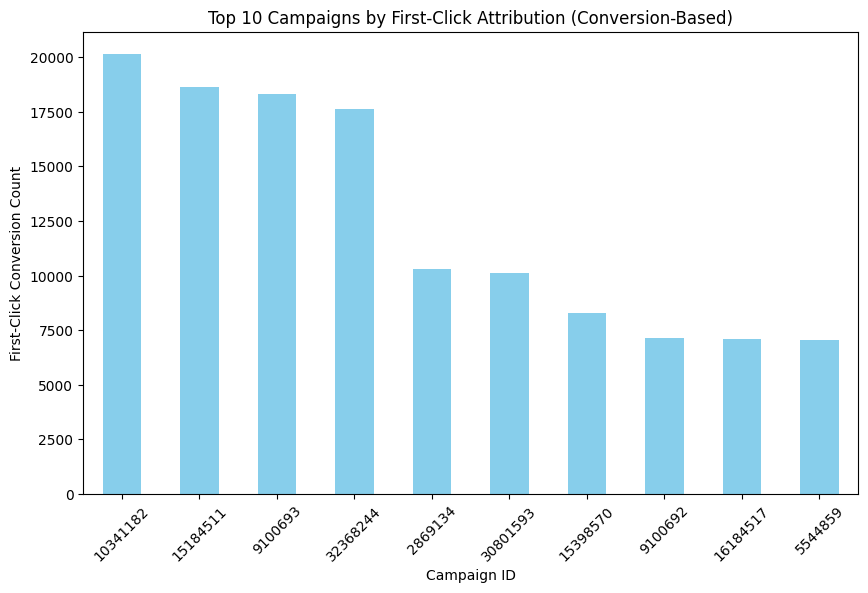

In [32]:
# Step 5: Display the top 10 campaigns in a bar chart for first-click attribution
plt.figure(figsize=(10, 6))
top_first_click_campaigns.plot(kind='bar', color='skyblue')
plt.xlabel('Campaign ID')
plt.ylabel('First-Click Conversion Count')
plt.title('Top 10 Campaigns by First-Click Attribution (Conversion-Based)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Last Click Attribution Model

In [33]:
# Step 1: Filter for rows where a click led to a conversion before the conversion timestamp
conversion_clicks = df[(df['click'] == 1) & (df['conversion'] == 1) & (df['timestamp'] <= df['conversion_timestamp'])]


In [34]:
# Step 2: Sort by user ID and timestamp to ensure chronological order
df_sorted = conversion_clicks.sort_values(by=['uid', 'timestamp'])



In [ ]:
# Step 3: Get the last click for each user before conversion
last_click_attributions = df_sorted.groupby('uid').last().reset_index()


In [37]:
# Step 4: Select only relevant columns for analysis
last_click_attributions = last_click_attributions[['uid', 'campaign', 'timestamp', 'click_pos']]

In [38]:
# Step 5: Count last-click occurrences by campaign
last_click_summary = last_click_attributions['campaign'].value_counts()
print("Last-Click Attribution Summary (Conversion-Based):\n", last_click_summary)

Last-Click Attribution Summary (Conversion-Based):
 campaign
10341182    14519
9100693     12425
15184511    11585
30801593     9674
32368244     9229
            ...  
12843319       11
13442441        7
20443097        6
20843295        4
13442456        2
Name: count, Length: 675, dtype: int64


In [39]:
# Step 6: Get the top 10 campaigns by last-click attribution count
top_last_click_campaigns = last_click_summary.head(10)
print("Top 10 Campaigns by Last-Click Attribution (Conversion-Based):\n", top_last_click_campaigns)


Top 10 Campaigns by Last-Click Attribution (Conversion-Based):
 campaign
10341182    14519
9100693     12425
15184511    11585
30801593     9674
32368244     9229
15398570     7576
2869134      7568
29427842     6119
5061834      5989
9100692      5061
Name: count, dtype: int64


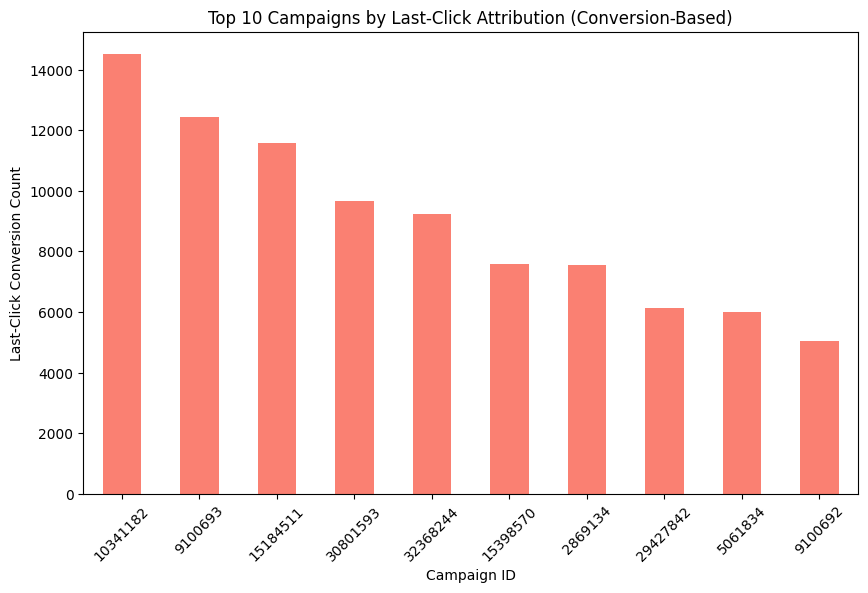

In [40]:
# Display the top 10 campaigns in a bar chart for last-click attribution
plt.figure(figsize=(10, 6))
top_last_click_campaigns.plot(kind='bar', color='salmon')
plt.xlabel('Campaign ID')
plt.ylabel('Last-Click Conversion Count')
plt.title('Top 10 Campaigns by Last-Click Attribution (Conversion-Based)')
plt.xticks(rotation=45)
plt.show()